In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy scikit-learn tensorflow matplotlib


Data loading and preprocessing complete.
Training set size: 960, Testing set size: 240
Epoch 1/10
30/30 [==============================] - 8s 233ms/step - loss: 1.1530 - accuracy: 0.3479 - val_loss: 1.0963 - val_accuracy: 0.4208
Epoch 2/10
30/30 [==============================] - 6s 203ms/step - loss: 1.0841 - accuracy: 0.4115 - val_loss: 1.0680 - val_accuracy: 0.4542
Epoch 3/10
30/30 [==============================] - 5s 155ms/step - loss: 1.0144 - accuracy: 0.5094 - val_loss: 1.0344 - val_accuracy: 0.4667
Epoch 4/10
30/30 [==============================] - 7s 219ms/step - loss: 0.9313 - accuracy: 0.5604 - val_loss: 1.0324 - val_accuracy: 0.4708
Epoch 5/10
30/30 [==============================] - 7s 221ms/step - loss: 0.8251 - accuracy: 0.6344 - val_loss: 1.0956 - val_accuracy: 0.4917
Epoch 6/10
30/30 [==============================] - 5s 160ms/step - loss: 0.7031 - accuracy: 0.7260 - val_loss: 1.1483 - val_accuracy: 0.4708
Epoch 7/10
30/30 [==============================] - 7s 245ms/

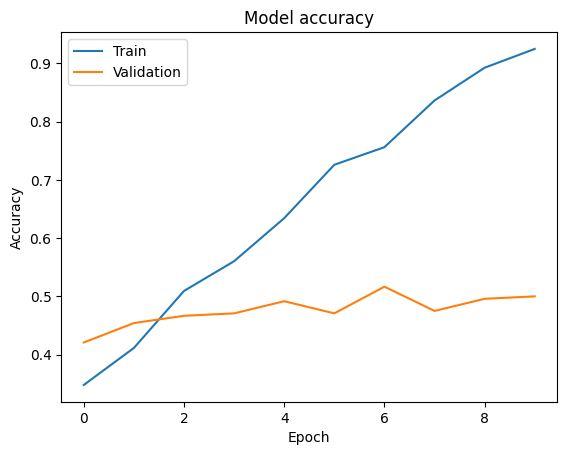

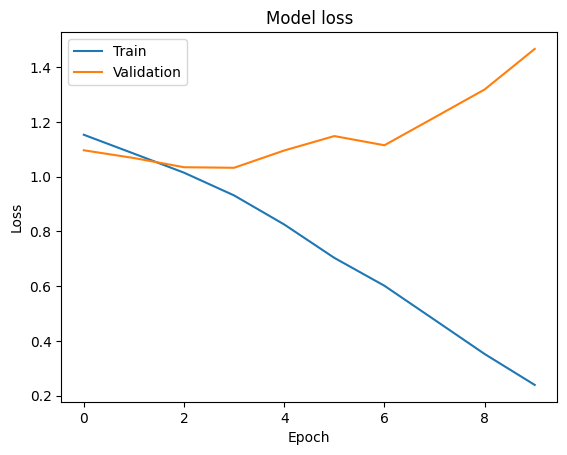

In [ ]:


# Import libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam



# Paths to your dataset
cat_dir = '/content/drive/MyDrive/Species_Recognition_Dataset/cat'
dog_dir = '/content/drive/MyDrive/Species_Recognition_Dataset/dog'
bird_dir = '/content/drive/MyDrive/Species_Recognition_Dataset/bird'

def load_and_preprocess_images(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, color_mode='grayscale', target_size=image_size)
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

# Load and preprocess images
cat_images, cat_labels = load_and_preprocess_images(cat_dir, 0)
dog_images, dog_labels = load_and_preprocess_images(dog_dir, 1)
bird_images, bird_labels = load_and_preprocess_images(bird_dir, 2)

# Combine the data
X = np.array(cat_images + dog_images + bird_images)
y = np.array(cat_labels + dog_labels + bird_labels)

# Normalize the images
X = X / 255.0

# Convert labels to categorical
y = to_categorical(y, num_classes=3)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data loading and preprocessing complete.")
print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: cat, dog, bird
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

print("Model training complete.")

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Function to predict new images
def predict_image(model, img_path, image_size=(64, 64)):
    img = load_img(img_path, color_mode='grayscale', target_size=image_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction, axis=1)[0]
    classes = ['Cat', 'Dog', 'Bird']
    return classes[class_index]

# Example usage
# new_image_path = '/content/drive/MyDrive/path_to_new_image.jpg'
# result = predict_image(model, new_image_path)
# print(f'The image is predicted to be: {result}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Mounted at /content/drive
Data loading and preprocessing complete.
Training set size: 1091, Testing set size: 468
Epoch 1/10
35/35 [==============================] - 12s 296ms/step - loss: 1.1029 - accuracy: 0.3520 - val_loss: 1.0773 - val_accuracy: 0.4103
Epoch 2/10
35/35 [==============================] - 5s 152ms/step - loss: 1.0697 - accuracy: 0.4235 - val_loss: 1.0479 - val_accuracy: 0.4338
Epoch 3/10
35/35 [==============================] - 7s 191ms/step - loss: 1.0383 - accuracy: 0.4968 - val_loss: 1.0610 - val_accuracy: 0.4231
Epoch 4/10
35/35 [==============================] - 7s 187ms/step - loss: 0.9937 - accuracy: 0.5096 - val_loss: 1.0350 - val_accuracy: 0.4573
Epoch 5/10
35/35 [==============================] - 5s 146ms/step - loss: 0.9262 - accuracy: 0.5866 - val_loss: 1.1268 - val_accuracy: 0.4167
Epoch 6/10
35/35 [==============================] - 8s 231ms/step - loss: 0.8819 - accuracy: 0.6178 - val_loss: 1.0463 - val_accuracy: 0.4744
Epoch 7/10
35/35 [===============

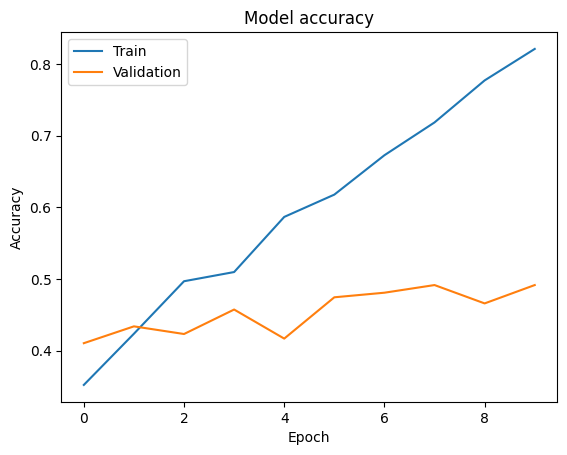

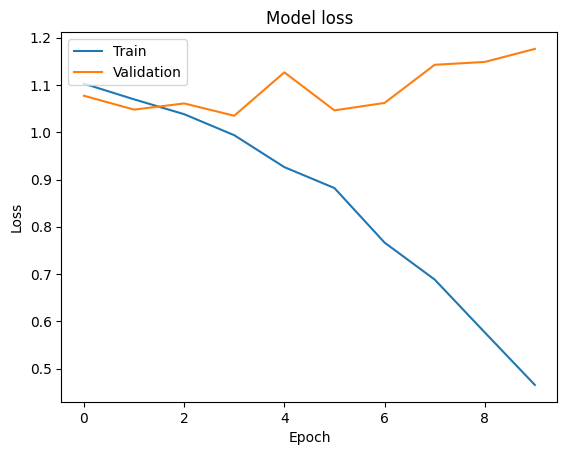

In [ ]:
# Install necessary
!pip install numpy scikit-learn tensorflow matplotlib

# Import libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Paths to your dataset
cat_dir = '/content/drive/MyDrive/Species_Recognition_Dataset/cat'
dog_dir = '/content/drive/MyDrive/Species_Recognition_Dataset/dog'
bird_dir = '/content/drive/MyDrive/Species_Recognition_Dataset/bird'

def load_and_preprocess_images(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, color_mode='grayscale', target_size=image_size)
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

# Load and preprocess images
cat_images, cat_labels = load_and_preprocess_images(cat_dir, 0)
dog_images, dog_labels = load_and_preprocess_images(dog_dir, 1)
bird_images, bird_labels = load_and_preprocess_images(bird_dir, 2)

# Combine the data
X = np.array(cat_images + dog_images + bird_images)
y = np.array(cat_labels + dog_labels + bird_labels)

# Normalize the images
X = X / 255.0

# Convert labels to categorical
y = to_categorical(y, num_classes=3)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data loading and preprocessing complete.")
print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),  # Add dropout for regularization
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: cat, dog, bird
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

print("Model training complete.")

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Function to predict new images
def predict_image(model, img_path, image_size=(64, 64)):
    img = load_img(img_path, color_mode='grayscale', target_size=image_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction, axis=1)[0]
    classes = ['Cat', 'Dog', 'Bird']
    return classes[class_index]


new_image_path = '/content/drive/MyDrive/bird.jpeg'
result = predict_image(model, new_image_path)
print(f'The image is predicted to be: {result}')

new_image_path = '/content/drive/MyDrive/dog.jpeg'
result = predict_image(model, new_image_path)
print(f'The image is predicted to be: {result}')

new_image_path = '/content/drive/MyDrive/cat.jpeg'
result = predict_image(model, new_image_path)
print(f'The image is predicted to be: {result}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loading and preprocessing complete.
Training set size: 1091, Testing set size: 468
Epoch 1/50
35/35 [==============================] - 11s 251ms/step - loss: 1.1107 - accuracy: 0.3373 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 2/50
35/35 [==============================] - 10s 293ms/step - loss: 1.1083 - accuracy: 0.3401 - val_loss: 1.0989 - val_accuracy: 0.3376
Epoch 3/50
35/35 [==============================] - 11s 292ms/step - loss: 1.1073 - accuracy: 0.3355 - val_loss: 1.0985 - val_accuracy: 0.3312
Epoch 4/50
35/35 [==============================] - 11s 321ms/step - loss: 1.1043 - accuracy: 0.3410 - val_loss: 1.0984 - val_accuracy: 0.3162
Epoch 5/50
35/35 [==============================] - 9s 246ms/step - loss: 1.0979 - accuracy: 0.3254 - val_loss: 1.0981 - val_accuracy: 0.3291
Epoch 6/50
35/35 [==============================] - 11s 308ms/step - 

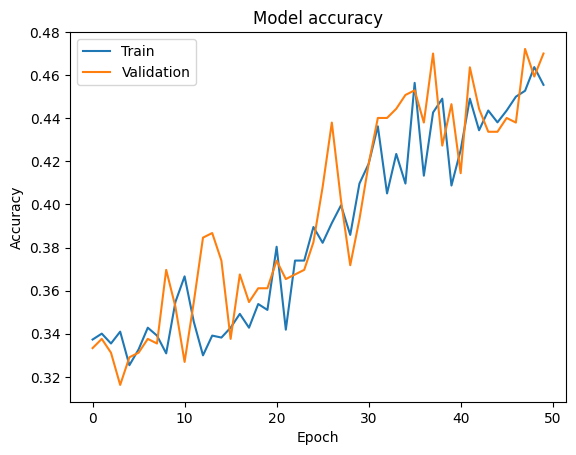

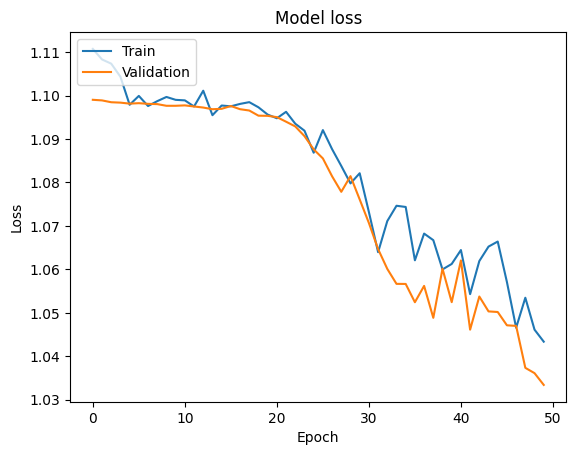

In [3]:
# Install necessary libraries
!pip install numpy scikit-learn tensorflow matplotlib

# Import libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


from google.colab import drive
drive.mount('/content/drive')


cat_dir = '/content/drive/MyDrive/Species_Recognition_Dataset/cat'
dog_dir = '/content/drive/MyDrive/Species_Recognition_Dataset/dog'
bird_dir = '/content/drive/MyDrive/Species_Recognition_Dataset/bird'

def load_and_preprocess_images(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, co5+lor_mode='grayscale', target_size=image_size)
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

cat_images, cat_labels = load_and_preprocess_images(cat_dir, 0)
dog_images, dog_labels = load_and_preprocess_images(dog_dir, 1)
bird_images, bird_labels = load_and_preprocess_images(bird_dir, 2)

X = np.array(cat_images + dog_images + bird_images)
y = np.array(cat_labels + dog_labels + bird_labels)

X = X / 255.0
y = to_categorical(y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data loading and preprocessing complete.")
print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=35),
    epochs=50,
    validation_data=(X_test, y_test)
)

print("Model training complete.")

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

def predict_image(model, img_path, image_size=(64, 64)):
    img = load_img(img_path, color_mode='grayscale', target_size=image_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction, axis=1)[0]
    classes = ['Cat', 'Dog', 'Bird']
    return classes[class_index]

new_image_path = '/content/drive/MyDrive/greybird.jpg'
result = predict_image(model, new_image_path)
print(f'The image is predicted to be: {result}')
+
new_image_path = '/content/drive/MyDrive/greydog.jpg'
result = predict_image(model, new_image_path)
print(f'The image is predicted to be: {result}')

new_image_path = '/content/drive/MyDrive/cat.jpeg'
result = predict_image(model, new_image_path)
print(f'The image is predicted to be: {result}')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
